In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import mplfinance as mpf
from tqdm import tqdm
import datetime as dt

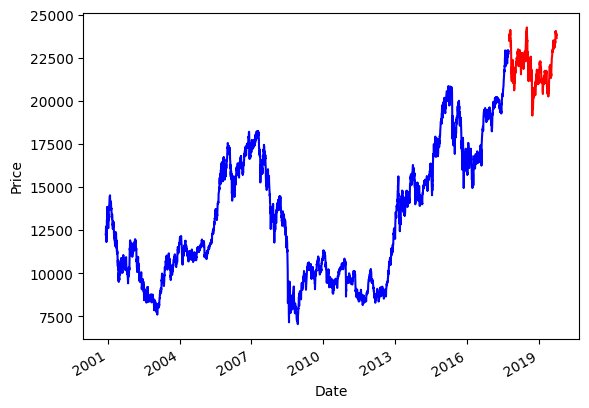

In [ ]:
from datetime import datetime
import matplotlib.dates as mdates
df = pd.read_csv("price.csv", index_col='Date', parse_dates=True)
df = df[df.index <= dt.datetime(2020, 1, 1)]
df

fig, ax = plt.subplots()
ax.set_ylabel("Price")

ax = df.loc[df.index <= dt.datetime(2017, 12, 31),'Close'].plot(color='b')
df.loc[df.index >= dt.datetime(2017, 12, 31), 'Close'].plot(color='r', ax=ax)

locator = mdates.YearLocator(base=3, month=4, day=1)
ax.xaxis.set_major_locator(locator)
plt.show()

In [ ]:
df = pd.read_csv("price.csv", index_col='Date', parse_dates=True)
# df.index = pd.DatetimeIndex(df['Date'])
df = df.drop(columns=['Unnamed: 0'])
# df["SMA5"] = df["Close"].rolling(window=5).mean()
# df["SMA25"] = df["Close"].rolling(window=25).mean()
# df = df.dropna()
# print(type(df.index))
df[:4450]

,Open,High,Low,Close,MACD,Signal,RSI,SMA5,SMA25,Label
Date,,,,,,,,,,
2001-03-02,12594.46,12594.46,12261.80,12261.80,-213.857818,-137.958324,18.943629,12817.600,13288.5676,0
2001-03-05,12285.46,12389.09,12133.90,12322.16,-246.420657,-152.460470,23.265187,12641.804,13233.6116,1
2001-03-06,12402.89,12687.74,12351.14,12687.74,-241.066496,-165.508645,36.052169,12567.380,13187.3100,1
2001-03-07,12748.56,12824.19,12539.75,12723.89,-231.332099,-176.742605,35.836658,12535.450,13143.1996,1
2001-03-08,12694.22,12756.97,12584.10,12650.56,-226.711810,-188.485704,37.208872,12529.230,13095.4800,0
...,...,...,...,...,...,...,...,...,...,...
2021-04-14,29718.06,29722.40,29567.18,29620.99,109.455309,106.458295,65.115498,29677.674,29526.6704,0
2021-04-15,29573.90,29787.66,29558.55,29642.69,103.346146,113.052751,59.236487,29664.416,29543.9124,1
2021-04-16,29789.08,29789.08,29621.83,29683.37,100.627160,113.333455,56.343906,29647.478,29542.5340,1


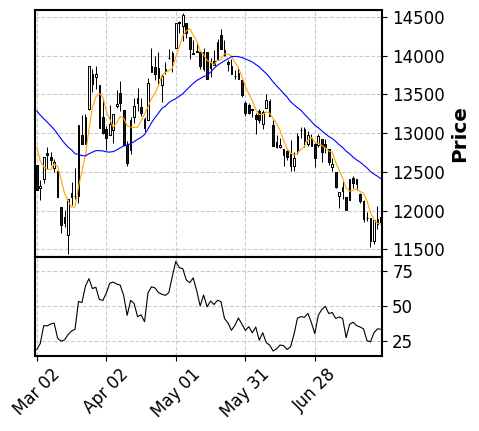

In [9]:
span = 100

add_plot = [
    mpf.make_addplot(df["SMA5"][:span], panel=0, color="orange", width=0.8),
    mpf.make_addplot(df["SMA25"][:span], panel=0, color="blue", width=0.8),
    # mpf.make_addplot(df["MACD"][i+k:i+k+span], panel=1, color="green", width=0.8),
    # mpf.make_addplot(df["Signal"][i+k:i+k+span], panel=1, color="magenta", width=0.8),
    mpf.make_addplot(df["RSI"][:span], panel=1, color="black", width=0.8),
]
mpf.plot(df[:span], type="candle", style="classic", figsize=(4,4), tight_layout=True, addplot=add_plot)

In [43]:
datename = df.index.strftime('%Y-%m-%d')
print(f'{str(datename[0])}~{str(datename[59])}')
print(df.shape[0]-60)
# print(f'{df.index[0]}~{df.index[0+60]}')
# print(df.loc[df.index[0:60], 'Label'])

2001-03-02~2001-05-30
4901


In [45]:
span = 60
train_len = 4230    #2018-04-19まで
val_len = 4475      #2019-04-19まで
dirname = '/Users/ohno/study/images/tmp/'
for i in tqdm(range(4475-span)):
    if not(os.path.exists(dirname)):
        os.makedirs(dirname)
    add_plot = [
        mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
        mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
        mpf.make_addplot(df["RSI"][i:i+span], panel=0, color="red", width=0.8),
    ]
    mpf.plot(df[i:i+span], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(dirname+f'{str(datename[i])}~{str(datename[i+span-1])}.png'),dpi=100))
    plt.cla()
    plt.clf()
    plt.close()

100%|██████████| 4415/4415 [27:35<00:00,  2.67it/s]   


In [7]:
span = 60
seq_len = 30
stride = 3
train_len = 4230    #2018-04-19まで
val_len = 4475      #2019-04-19まで
dirname = '/Users/ohno/study/images/stride/3/'
for i in tqdm(range(df.shape[0]-span)):
    foldername = dirname+f'{str(datename[i])}~{str(datename[i+span-1])}/'
    if not(os.path.exists(foldername)):
        os.makedirs(foldername)
        for k in range(0, span-seq_len+1, stride):
            add_plot = [
                mpf.make_addplot(df["SMA5"][i+k:i+k+seq_len], panel=0, color="orange", width=0.8),
                mpf.make_addplot(df["SMA25"][i+k:i+k+seq_len], panel=0, color="blue", width=0.8),
                mpf.make_addplot(df["RSI"][i+k:i+k+seq_len], panel=0, color="red", width=0.8),
            ]
            mpf.plot(df[i+k:i+k+seq_len], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=foldername+f'{str(datename[i+k])}~{str(datename[i+k+seq_len-1])}.png',dpi=100))
        plt.cla()
        plt.clf()
        plt.close()

  0%|          | 0/4901 [00:00<?, ?it/s]

100%|██████████| 4901/4901 [1:31:44<00:00,  1.12s/it] 


In [ ]:
# span = 60
# train_len = 4230    #2018-04-19まで
# val_len = 4475      #2019-04-19まで
# train_dirname = '/Users/ohno/study/images/candle/RSI/train/'
# val_dirname = '/Users/ohno/study/images/candle/RSI/val/'
# test_dirname = '/Users/ohno/study/images/candle/RSI/test/'
# if '/Users/ohno/study/images/candle/RSI/' == None:
#     for i in tqdm(range(df.shape[0]-span)):
#         add_plot = [
#             mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
#             mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
#             mpf.make_addplot(df["RSI"][i:i+span], panel=0, color="red", width=0.8),
#         ]
#         if not(os.path.exists(dirname)):
#             os.makedirs(dirname)
#         if i < train_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(train_dirname + 'down/')):
#                     os.makedirs(train_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(train_dirname + 'up/')):
#                     os.makedirs(train_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         elif train_len <= i < val_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(val_dirname + 'down/')):
#                     os.makedirs(val_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(val_dirname + 'up/')):
#                     os.makedirs(val_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))         
#         else:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(test_dirname + 'down/')):
#                     os.makedirs(test_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(test_dirname + 'up/')):
#                     os.makedirs(test_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         plt.clf()
#         plt.close()

In [ ]:
# train_dirname = '/Users/ohno/study/images/candle/MACD/train/'
# val_dirname = '/Users/ohno/study/images/candle/MACD/val/'
# test_dirname = '/Users/ohno/study/images/candle/MACD/test/'
# if '/Users/ohno/study/images/candle/MACD/' == None:
#     for i in tqdm(range(df.shape[0]-span)):
#         add_plot = [
#             mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
#             mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
#             mpf.make_addplot(df["MACD"][i:i+span], panel=0, color="green", width=0.8),
#             mpf.make_addplot(df["Signal"][i:i+span], panel=0, color="magenta", width=0.8),
#         ]
#         if not(os.path.exists(dirname)):
#             os.makedirs(dirname)
#         if i < train_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(train_dirname + 'down/')):
#                     os.makedirs(train_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(train_dirname + 'up/')):
#                     os.makedirs(train_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         elif train_len <= i < val_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(val_dirname + 'down/')):
#                     os.makedirs(val_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(val_dirname + 'up/')):
#                     os.makedirs(val_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))         
#         else:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(test_dirname + 'down/')):
#                     os.makedirs(test_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(test_dirname + 'up/')):
#                     os.makedirs(test_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         plt.clf()
#         plt.close()

In [ ]:
# train_dirname = '/Users/ohno/study/images/candle/RSI_MACD/train/'
# val_dirname = '/Users/ohno/study/images/candle/RSI_MACD/val/'
# test_dirname = '/Users/ohno/study/images/candle/RSI_MACD/test/'
# if '/Users/ohno/study/images/candle/RSI_MACD/' == None:
#     for i in tqdm(range(df.shape[0]-span)):
#         add_plot = [
#             mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
#             mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
#             mpf.make_addplot(df["MACD"][i:i+span], panel=1, color="green", width=0.8),
#             mpf.make_addplot(df["Signal"][i:i+span], panel=1, color="magenta", width=0.8),
#             mpf.make_addplot(df["RSI"][i:i+span], panel=0, color="red", width=0.8),
#         ]
#         if not(os.path.exists(dirname)):
#             os.makedirs(dirname)
#         if i < train_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(train_dirname + 'down/')):
#                     os.makedirs(train_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(train_dirname + 'up/')):
#                     os.makedirs(train_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         elif train_len <= i < val_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(val_dirname + 'down/')):
#                     os.makedirs(val_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(val_dirname + 'up/')):
#                     os.makedirs(val_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))         
#         else:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(test_dirname + 'down/')):
#                     os.makedirs(test_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(test_dirname + 'up/')):
#                     os.makedirs(test_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         plt.clf()
#         plt.close()

In [ ]:
# train_dirname = '/Users/ohno/study/images/candle/MACD_RSI/train/'
# val_dirname = '/Users/ohno/study/images/candle/MACD_RSI/val/'
# test_dirname = '/Users/ohno/study/images/candle/MACD_RSI/test/'
# if '/Users/ohno/study/images/candle/MACD_RSI/' == None:
#     for i in tqdm(range(df.shape[0]-span)):
#         add_plot = [
#             mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
#             mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
#             mpf.make_addplot(df["MACD"][i:i+span], panel=0, color="green", width=0.8),
#             mpf.make_addplot(df["Signal"][i:i+span], panel=0, color="magenta", width=0.8),
#             mpf.make_addplot(df["RSI"][i:i+span], panel=1, color="red", width=0.8),
#         ]
#         if not(os.path.exists(dirname)):
#             os.makedirs(dirname)
#         if i < train_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(train_dirname + 'down/')):
#                     os.makedirs(train_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(train_dirname + 'up/')):
#                     os.makedirs(train_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         elif train_len <= i < val_len:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(val_dirname + 'down/')):
#                     os.makedirs(val_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(val_dirname + 'up/')):
#                     os.makedirs(val_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))         
#         else:
#             if df.loc[df.index[i+span], 'Label'] == 0:
#                 if not(os.path.exists(test_dirname + 'down/')):
#                     os.makedirs(test_dirname + 'down/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#             else:
#                 if not(os.path.exists(test_dirname + 'up/')):
#                     os.makedirs(test_dirname + 'up/')
#                 mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         plt.clf()
#         plt.close()

In [ ]:
# train_dirname = '/Users/ohno/study/images/candle/_MACD_RSI/train/'
# val_dirname = '/Users/ohno/study/images/candle/_MACD_RSI/val/'
# test_dirname = '/Users/ohno/study/images/candle/_MACD_RSI/test/'
# for i in tqdm(range(df.shape[0]-span)):
#     add_plot = [
#         mpf.make_addplot(df["SMA5"][i:i+span], panel=0, color="orange", width=0.8),
#         mpf.make_addplot(df["SMA25"][i:i+span], panel=0, color="blue", width=0.8),
#         mpf.make_addplot(df["MACD"][i:i+span], panel=1, color="green", width=0.8),
#         mpf.make_addplot(df["Signal"][i:i+span], panel=1, color="magenta", width=0.8),
#         mpf.make_addplot(df["RSI"][i:i+span], panel=2, color="red", width=0.8),
#     ]
#     if not(os.path.exists(dirname)):
#         os.makedirs(dirname)
#     if i < train_len:
#         if df.loc[df.index[i+span], 'Label'] == 0:
#             if not(os.path.exists(train_dirname + 'down/')):
#                 os.makedirs(train_dirname + 'down/')
#             mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         else:
#             if not(os.path.exists(train_dirname + 'up/')):
#                 os.makedirs(train_dirname + 'up/')
#             mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(train_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#     elif train_len <= i < val_len:
#         if df.loc[df.index[i+span], 'Label'] == 0:
#             if not(os.path.exists(val_dirname + 'down/')):
#                 os.makedirs(val_dirname + 'down/')
#             mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         else:
#             if not(os.path.exists(val_dirname + 'up/')):
#                 os.makedirs(val_dirname + 'up/')
#             mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(val_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))         
#     else:
#         if df.loc[df.index[i+span], 'Label'] == 0:
#             if not(os.path.exists(test_dirname + 'down/')):
#                 os.makedirs(test_dirname + 'down/')
#             mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'down/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#         else:
#             if not(os.path.exists(test_dirname + 'up/')):
#                 os.makedirs(test_dirname + 'up/')
#             mpf.plot(df[i:i+60], type="candle", style="classic", figsize=(4,4), tight_layout=True, axisoff=True, addplot=add_plot, savefig=dict(fname=(test_dirname+f'up/{str(filename[i])}~{str(filename[i+span])}.png'),dpi=100))
#     plt.clf()
#     plt.close()

  0%|          | 0/4901 [00:00<?, ?it/s]

100%|██████████| 4901/4901 [1:27:25<00:00,  1.07s/it]
